# 연습문제(1)

회귀분석을 통해 예측 모델을 만들고 해당 모델의 성능을 파악 하기 위해 제공되는 사이킷런의 성능 지표 모듈

## #01. 작업준비

### 패키지 가져오기 


In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
import helper


from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

import numpy as np

## #01. 문제 (1)



In [9]:
df = pd.read_excel("https://data.hossam.kr/E04/beans.xlsx")
df.head()

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31


### 다항식으로 표현

In [10]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [15]:
poly = PolynomialFeatures(degree=2 , include_bias=False)
fit = poly.fit_transform(df[['수분함유량']])
poly.get_feature_names_out()

array(['수분함유량', '수분함유량^2'], dtype=object)

In [17]:
x= pd.DataFrame(fit,columns=poly.get_feature_names_out())
x.head()

,수분함유량,수분함유량^2
0,36.0,1296.0
1,40.0,1600.0
2,34.0,1156.0
3,44.0,1936.0
4,33.0,1089.0


In [18]:
y= df[['강도']]
y.head()

,강도
0,29
1,32
2,29
3,40
4,31


### 데이터 분리

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7, 2)
(7, 1)
(3, 2)
(3, 1)


### 회귀분석

In [21]:
x_test

,수분함유량,수분함유량^2
4,33.0,1089.0
0,36.0,1296.0
7,33.0,1089.0


In [20]:
model = LinearRegression()
fit = model.fit(x_train,y_train)

## 직선의 기울기 
coef = fit.coef_



## 절편 
intercept = fit.intercept_

print ('기울기: ', coef)

print('절편 : ',intercept )



기울기:  [[-2.05422407  0.04045876]]
절편 :  [51.29936854]
훈련 데이터 설명력 :  0.948987598169573
검증 데이터 설명력 :  -8.143084034528927


## 설명력

In [22]:
y_train_pred = fit.predict(x_train)

y_test_pred = fit.predict(x_test)



In [23]:

print('훈련 데이터 설명력 : ',r2_score(y_train,y_train_pred))
print('검증 데이터 설명력 : ',r2_score(y_test,y_test_pred))

훈련 데이터 설명력 :  0.948987598169573
검증 데이터 설명력 :  -8.143084034528927


### 에러율

In [32]:
print('훈련 데이터 MAE : ',mean_absolute_error(y_train,y_train_pred))

print('훈련 데이터 MAE : ',mean_absolute_error(y_test,y_test_pred))

print('훈련 데이터 MSE : ',mean_squared_error(y_train,y_train_pred))

print('훈련 데이터 MSE : ',mean_squared_error(y_test,y_test_pred))

print('훈련 데이터 RMSE : ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('훈련 데이터 RMSE : ',np.sqrt(mean_squared_error(y_test,y_test_pred)))


print('훈련 데이터 MAPE : ',np.mean(np.abs((y_train.values - y_train_pred)/y_train.values))*100)

print('검증 데이터 MAPE : ',np.mean(np.abs((y_test.values - y_test_pred)/y_test.values))*100)

print('훈련 데이터 MPE : ',np.mean((y_train.values - y_train_pred)/y_train.values)*100)

print('검증 데이터 MPE : ',np.mean((y_test.values - y_test_pred)/y_test.values)*100)

훈련 데이터 MAE :  0.8245585260510643
훈련 데이터 MAE :  2.214241293532337
훈련 데이터 MSE :  0.9744409819036656
훈련 데이터 MSE :  6.0953893563526185
훈련 데이터 RMSE :  0.9871377725037501
훈련 데이터 RMSE :  2.4688842330803236
훈련 데이터 MAPE :  2.6248278332767847
검증 데이터 MAPE :  7.287806079908203
훈련 데이터 MPE :  -0.08405044961718743
검증 데이터 MPE :  5.490426927922783


### 시각화

In [34]:
y_train

,강도
5,29
8,25
3,40
1,32
6,34
9,31
2,29


In [33]:
x_train

,수분함유량,수분함유량^2
5,36.0,1296.0
8,26.0,676.0
3,44.0,1936.0
1,40.0,1600.0
6,40.0,1600.0
9,36.0,1296.0
2,34.0,1156.0


In [41]:
x_train['수분함유량']

5    36.0
8    26.0
3    44.0
1    40.0
6    40.0
9    36.0
2    34.0
Name: 수분함유량, dtype: float64

In [44]:
y_train_pred.reshape(-1)

array([29.78185993, 25.23966705, 39.24167623, 33.86442786, 33.86442786,
       29.78185993, 28.22608113])

c:\Users\hamin\조해민\Data_Analysis\helper.py:825: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x,y,degree)
c:\Users\hamin\조해민\Data_Analysis\helper.py:825: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x,y,degree)


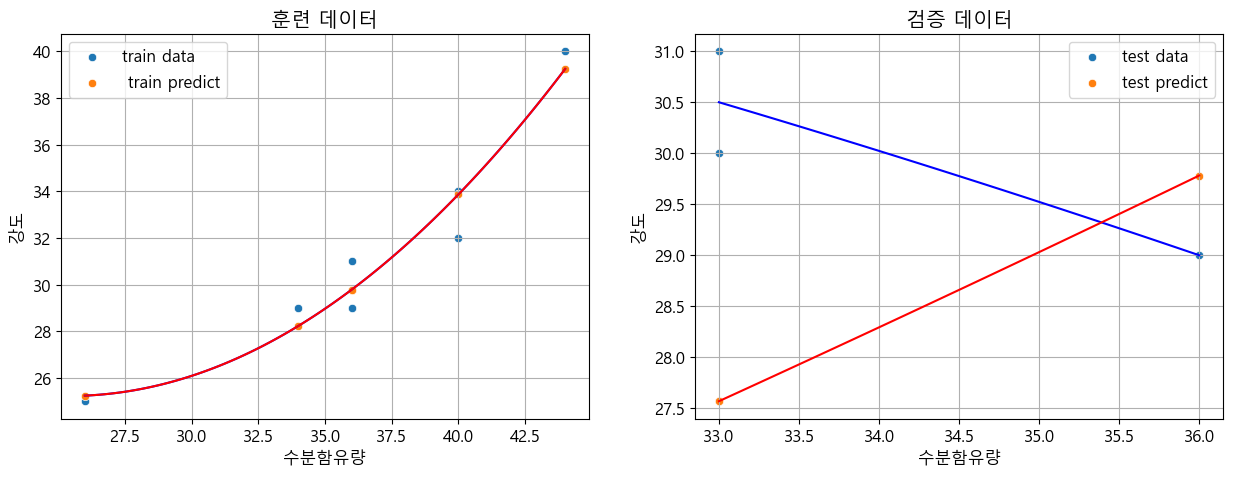

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
## 학습에 사용된 관측치 시각화

sb.scatterplot(x=x_train['수분함유량'],y=y_train['강도'],label = 'train data',ax=ax1)
## 학습에 사용한 데이터에 추세선
x,y = helper.getTrend(x_train['수분함유량'],y_train['강도'])
sb.lineplot(x=x,y=y,color='blue',ax=ax1)
## 학습 데이터에 따른 추정치
sb.scatterplot(x=x_train['수분함유량'],y=y_train_pred.reshape(-1),label = ' train predict',ax=ax1)

### 추정치에 대한 추세선
x,y= helper.getTrend(x=x_train['수분함유량'],y=y_train_pred.reshape(-1))
sb.lineplot(x=x,y=y,color='red',ax=ax1)
ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

## 검증데이터 시각화
sb.scatterplot(x=x_test['수분함유량'],y=y_test['강도'],label = 'test data',ax=ax2)
## 검증데이터 추세선
x,y = helper.getTrend(x_test['수분함유량'],y_test['강도'])
sb.lineplot(x=x,y=y,color='blue',ax=ax2)
### 검증데이터 추정치 시각화
sb.scatterplot(x=x_test['수분함유량'],y=y_test_pred.reshape(-1),label= 'test predict',ax=ax2)

## 검증데이터 추정치에 대한 추세선
x,y = helper.getTrend(x_test['수분함유량'],y_test_pred.reshape(-1))
sb.lineplot(x=x,y=y,color='red',ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

## #02. 문제(2)

In [49]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [50]:
df= pd.read_excel('https://data.hossam.kr/E04/aircon.xlsx')
df.head()

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50


In [51]:
poly = PolynomialFeatures(degree=2,include_bias=False)
fit = poly.fit_transform(df[['예약대수']])
poly.get_feature_names_out()

array(['예약대수', '예약대수^2'], dtype=object)

In [53]:
x= pd.DataFrame(fit,columns=poly.get_feature_names_out())
x.head()

,예약대수,예약대수^2
0,19.0,361.0
1,23.0,529.0
2,26.0,676.0
3,29.0,841.0
4,30.0,900.0


In [54]:
y=df[['판매대수']]

### 데이터 분리

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7, 2)
(7, 1)
(3, 2)
(3, 1)


### 회귀분석


In [56]:
model = LinearRegression()
fit = model.fit(x_train,y_train)


## 기울기 
coef = fit.coef_
## 절편
intercept = fit.intercept_

print ('기울기: ', coef)

print('절편 : ',intercept )




기울기:  [[ 1.72732907e+00 -1.10258345e-03]]
절편 :  [3.61731765]


### 설명력

In [58]:
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)

print('훈련 데이터 설명력 : ',r2_score(y_train,y_train_pred))
print('검증 데이터 설명력 : ',r2_score(y_test,y_test_pred))



훈련 데이터 설명력 :  0.9418315846138151
검증 데이터 설명력 :  0.3583742568809699


### 에러율 

In [59]:
print('훈련 데이터 MAE : ',mean_absolute_error(y_train,y_train_pred))

print('훈련 데이터 MAE : ',mean_absolute_error(y_test,y_test_pred))

print('훈련 데이터 MSE : ',mean_squared_error(y_train,y_train_pred))

print('훈련 데이터 MSE : ',mean_squared_error(y_test,y_test_pred))

print('훈련 데이터 RMSE : ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('훈련 데이터 RMSE : ',np.sqrt(mean_squared_error(y_test,y_test_pred)))


print('훈련 데이터 MAPE : ',np.mean(np.abs((y_train.values - y_train_pred)/y_train.values))*100)

print('검증 데이터 MAPE : ',np.mean(np.abs((y_test.values - y_test_pred)/y_test.values))*100)

print('훈련 데이터 MPE : ',np.mean((y_train.values - y_train_pred)/y_train.values)*100)

print('검증 데이터 MPE : ',np.mean((y_test.values - y_test_pred)/y_test.values)*100)

훈련 데이터 MAE :  3.902407933472026
훈련 데이터 MAE :  8.074930020670541
훈련 데이터 MSE :  22.982459630133462
훈련 데이터 MSE :  103.08786939445751
훈련 데이터 RMSE :  4.794002464552293
훈련 데이터 RMSE :  10.153219656564982
훈련 데이터 MAPE :  7.4573619696148725
검증 데이터 MAPE :  14.751945665039626
훈련 데이터 MPE :  -0.9174718034904253
검증 데이터 MPE :  -14.751945665039626


### 시각화

<Axes: xlabel='예약대수', ylabel='판매대수'>

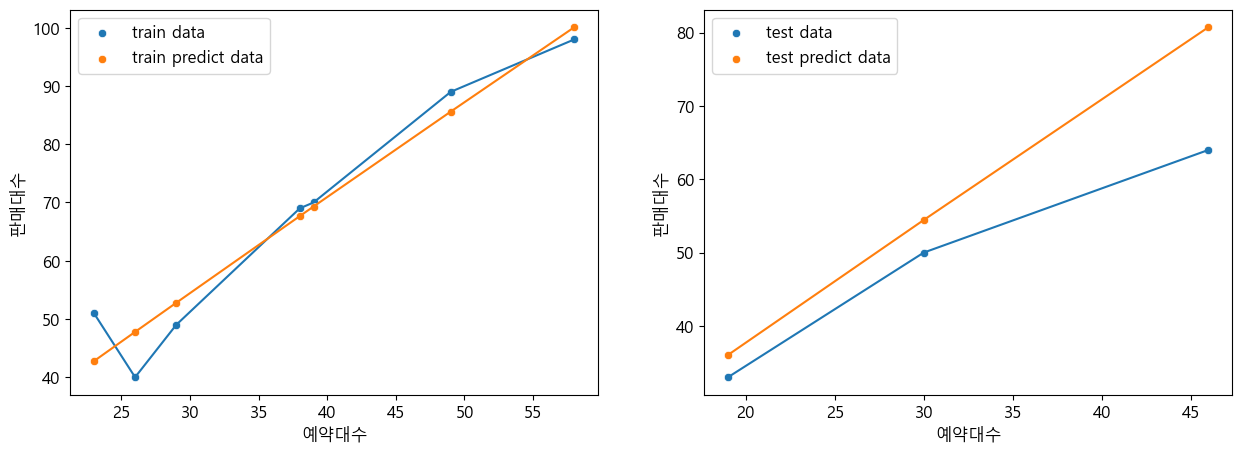

In [69]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
## 관측치 시각화
sb.scatterplot(x=x_train['예약대수'],y=y_train['판매대수'],label = 'train data',ax=ax1)
## 관측치 선그래프
sb.lineplot(x=x_train['예약대수'],y=y_train['판매대수'],ax=ax1)

### 학습데이터에 따른 추정치
sb.scatterplot(x=x_train['예약대수'],y=y_train_pred.reshape(-1),label='train predict data',ax=ax1)
## 추정치에 따른 선그래프
sb.lineplot(x=x_train['예약대수'],y=y_train_pred.reshape(-1),ax=ax1)

## 검증 데이터 시각화
sb.scatterplot(x=x_test['예약대수'],y=y_test['판매대수'],label='test data', ax=ax2)
## 검증 데이터 선그래프
sb.lineplot(x=x_test['예약대수'],y=y_test['판매대수'],ax=ax2)

## 검증데이터 추정치 
sb.scatterplot(x=x_test['예약대수'],y=y_test_pred.reshape(-1),label='test predict data',ax=ax2)
## 검증데이터 선그래프

sb.lineplot(x=x_test['예약대수'],y=y_test_pred.reshape(-1),ax=ax2)


## #03. 문제(3) 


In [71]:
df= pd.read_excel('https://data.hossam.kr/E04/galton.xlsx')
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [72]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

### 다항식 변환


In [74]:
poly = PolynomialFeatures(degree=2,include_bias=False)
fit=  poly.fit_transform(df[['parent']])
poly.get_feature_names_out()

array(['parent', 'parent^2'], dtype=object)

In [77]:
x= pd.DataFrame(fit,columns=poly.get_feature_names_out())

In [83]:
y=df[['child']]

### 데이터 분리

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(649, 2)
(649, 1)
(279, 2)
(279, 1)


### 회귀분석



In [85]:
model = LinearRegression()
fit = model.fit(x_train,y_train)

# 기울기 
coef = fit.coef_
# 절편
intercept = fit.intercept_
print ('기울기: ', coef)

print('절편 : ',intercept )



기울기:  [[-5.64286268  0.04574315]]
절편 :  [239.91854072]


### 설명력

In [86]:
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)

print('훈련 데이터 설명력 : ',r2_score(y_train,y_train_pred))
print('검증 데이터 설명력 : ',r2_score(y_test,y_test_pred))


훈련 데이터 설명력 :  0.1901345908760611
검증 데이터 설명력 :  0.263146408232788


### 에러율

In [87]:
print('훈련 데이터 MAE : ',mean_absolute_error(y_train,y_train_pred))

print('훈련 데이터 MAE : ',mean_absolute_error(y_test,y_test_pred))

print('훈련 데이터 MSE : ',mean_squared_error(y_train,y_train_pred))

print('훈련 데이터 MSE : ',mean_squared_error(y_test,y_test_pred))

print('훈련 데이터 RMSE : ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('훈련 데이터 RMSE : ',np.sqrt(mean_squared_error(y_test,y_test_pred)))


print('훈련 데이터 MAPE : ',np.mean(np.abs((y_train.values - y_train_pred)/y_train.values))*100)

print('검증 데이터 MAPE : ',np.mean(np.abs((y_test.values - y_test_pred)/y_test.values))*100)

print('훈련 데이터 MPE : ',np.mean((y_train.values - y_train_pred)/y_train.values)*100)

print('검증 데이터 MPE : ',np.mean((y_test.values - y_test_pred)/y_test.values)*100)

훈련 데이터 MAE :  1.810636603695316
훈련 데이터 MAE :  1.770594800859888
훈련 데이터 MSE :  5.057921456237263
훈련 데이터 MSE :  4.816645164441858
훈련 데이터 RMSE :  2.248982315679086
훈련 데이터 RMSE :  2.1946856641537207
훈련 데이터 MAPE :  2.6742113555454496
검증 데이터 MAPE :  2.6081757808120325
훈련 데이터 MPE :  -0.11038332335243407
검증 데이터 MPE :  0.08443350581051012


### 시각화

In [82]:
y_train

326    67.2
153    66.2
138    65.2
457    68.2
921    73.7
       ... 
241    66.2
253    66.2
390    67.2
667    69.2
843    71.2
Name: child, Length: 649, dtype: float64

<Axes: xlabel='parent', ylabel='child'>

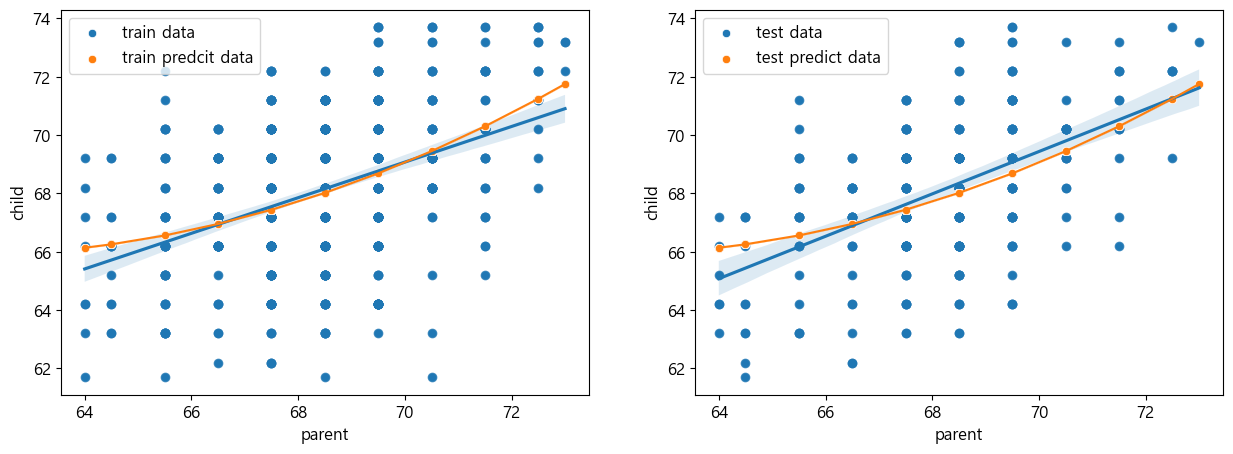

In [100]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
## 관측치 시각화 
sb.scatterplot(x=x_train['parent'],y=y_train['child'],ax=ax1,label='train data')
## 관측치 추세선
sb.regplot(x=x_train['parent'],y=y_train['child'],ax=ax1)

## 학습데이터에 따른 추정치
sb.scatterplot(x=x_train['parent'],y=y_train_pred.reshape(-1),ax=ax1,label='train predcit data')
## 추정치에 따른 그래프
sb.lineplot(x=x_train['parent'],y=y_train_pred.reshape(-1),ax=ax1) 

## 검증 데이터 시각화
sb.scatterplot(x=x_test['parent'],y=y_test['child'],label='test data',ax=ax2)
## 검증 데이터 추세선
sb.regplot(x=x_test['parent'],y=y_test['child'],ax=ax2)

## 검증 데이터 추정치 
sb.scatterplot(x=x_test['parent'],y=y_test_pred.reshape(-1),label='test predict data',ax=ax2)
## 검증 데이터 선그래프
sb.lineplot(x=x_test['parent'],y=y_test_pred.reshape(-1),ax=ax2)


In [95]:
len(y_train_pred)

649

## #04. 문제(4)

In [106]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [107]:
df= pd.read_excel('https://data.hossam.kr/E04/diabetes.xlsx')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135


### 상관관꼐 확인 후 데이터 제거

In [108]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [109]:
df = df.drop(['age','sex','s1','s2'],axis=1)
df.head()

,bmi,bp,s3,s4,s5,s6,target
0,0.061696,0.021872,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.051474,-0.026328,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.044451,-0.005670,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.011595,-0.036656,-0.036038,0.034309,0.022688,-0.009362,206
4,-0.036385,0.021872,0.008142,-0.002592,-0.031988,-0.046641,135


### 다항식 변환 


In [110]:
poly = PolynomialFeatures(degree=2,include_bias=False)
fit = poly.fit_transform(df.loc[:,['bmi','bp','s3','s4','s5','s6']])
poly.get_feature_names_out()

array(['bmi', 'bp', 's3', 's4', 's5', 's6', 'bmi^2', 'bmi bp', 'bmi s3',
       'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s3', 'bp s4', 'bp s5',
       'bp s6', 's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5',
       's4 s6', 's5^2', 's5 s6', 's6^2'], dtype=object)

In [111]:
x= pd.DataFrame(fit,columns=poly.get_feature_names_out())
x.head()

,bmi,bp,s3,s4,s5,s6,bmi^2,bmi bp,bmi s3,bmi s4,...,s3^2,s3 s4,s3 s5,s3 s6,s4^2,s4 s5,s4 s6,s5^2,s5 s6,s6^2
0,0.061696,0.021872,-0.043401,-0.002592,0.019907,-0.017646,0.003806,0.001349,-0.002678,-0.000160,...,0.001884,0.000113,-0.000864,0.000766,0.000007,-0.000052,0.000046,0.000396,-0.000351,0.000311
1,-0.051474,-0.026328,0.074412,-0.039493,-0.068332,-0.092204,0.002650,0.001355,-0.003830,0.002033,...,0.005537,-0.002939,-0.005085,-0.006861,0.001560,0.002699,0.003641,0.004669,0.006300,0.008502
2,0.044451,-0.005670,-0.032356,-0.002592,0.002861,-0.025930,0.001976,-0.000252,-0.001438,-0.000115,...,0.001047,0.000084,-0.000093,0.000839,0.000007,-0.000007,0.000067,0.000008,-0.000074,0.000672
3,-0.011595,-0.036656,-0.036038,0.034309,0.022688,-0.009362,0.000134,0.000425,0.000418,-0.000398,...,0.001299,-0.001236,-0.000818,0.000337,0.001177,0.000778,-0.000321,0.000515,-0.000212,0.000088
4,-0.036385,0.021872,0.008142,-0.002592,-0.031988,-0.046641,0.001324,-0.000796,-0.000296,0.000094,...,0.000066,-0.000021,-0.000260,-0.000380,0.000007,0.000083,0.000121,0.001023,0.001492,0.002175


In [112]:
y= df[['target']]
y.head()

,target
0,151
1,75
2,141
3,206
4,135


### 데이터 분리 

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(309, 27)
(309, 1)
(133, 27)
(133, 1)


### 회귀분석

In [114]:
model = LinearRegression()
fit = model.fit(x_train,y_train)

# 기울기 
coef = fit.coef_
# 절편
intercept = fit.intercept_
print ('기울기: ', coef)

print('절편 : ',intercept )



기울기:  [[  468.0272734    254.03838294  -377.6731231   -167.53359238
    497.1227199     31.90261944  1617.31808011   -44.51479607
  -1627.41271232  2240.40336565 -2660.50930091  1413.21393602
   1485.66198813   991.15396563  -124.28201755  4139.90895768
  -3524.13967687 -1488.83819995 -5626.04978941  1930.06660789
    758.43068462 -2608.16246591 -1811.72681967  1865.45115407
   -537.35075098   725.3453207   2001.65428375]]
절편 :  [142.08614897]


### 설명력

In [115]:
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)
print('훈련 데이터 설명력 : ',r2_score(y_train,y_train_pred))
print('검증 데이터 설명력 : ',r2_score(y_test,y_test_pred))


훈련 데이터 설명력 :  0.5344321578327741
검증 데이터 설명력 :  0.4478672633108255


### 에러율

In [116]:
print('훈련 데이터 MAE : ',mean_absolute_error(y_train,y_train_pred))

print('훈련 데이터 MAE : ',mean_absolute_error(y_test,y_test_pred))

print('훈련 데이터 MSE : ',mean_squared_error(y_train,y_train_pred))

print('훈련 데이터 MSE : ',mean_squared_error(y_test,y_test_pred))

print('훈련 데이터 RMSE : ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('훈련 데이터 RMSE : ',np.sqrt(mean_squared_error(y_test,y_test_pred)))


print('훈련 데이터 MAPE : ',np.mean(np.abs((y_train.values - y_train_pred)/y_train.values))*100)

print('검증 데이터 MAPE : ',np.mean(np.abs((y_test.values - y_test_pred)/y_test.values))*100)

print('훈련 데이터 MPE : ',np.mean((y_train.values - y_train_pred)/y_train.values)*100)

print('검증 데이터 MPE : ',np.mean((y_test.values - y_test_pred)/y_test.values)*100)

훈련 데이터 MAE :  43.15856339546352
훈련 데이터 MAE :  46.55942186835502
훈련 데이터 MSE :  2753.9967675894727
훈련 데이터 MSE :  3283.3729797463043
훈련 데이터 RMSE :  52.47853625616356
훈련 데이터 RMSE :  57.30072407698095
훈련 데이터 MAPE :  38.484143261232376
검증 데이터 MAPE :  41.33340517447052
훈련 데이터 MPE :  -17.56662410584182
검증 데이터 MPE :  -19.7489209498542


### 시각화

In [118]:
y_train

,target
374,140
420,146
204,277
263,116
285,233
...,...
230,220
98,92
322,242
382,132


In [121]:
x_train.head()

,bmi,bp,s3,s4,s5,s6,bmi^2,bmi bp,bmi s3,bmi s4,...,s3^2,s3 s4,s3 s5,s3 s6,s4^2,s4 s5,s4 s6,s5^2,s5 s6,s6^2
374,-0.034229,-0.067642,0.008142,-0.039493,-0.000612,-0.079778,0.001172,0.002315,-0.000279,0.001352,...,0.000066,-0.000322,-0.000005,-0.000650,0.001560,0.000024,0.003151,3.742201e-07,0.000049,0.006364
420,-0.036385,0.000079,-0.043401,0.034309,-0.033246,0.061054,0.001324,-0.000003,0.001579,-0.001248,...,0.001884,-0.001489,0.001443,-0.002650,0.001177,-0.001141,0.002095,1.105269e-03,-0.002030,0.003728
204,0.006728,0.028758,-0.047082,0.034309,0.002004,0.077622,0.000045,0.000193,-0.000317,0.000231,...,0.002217,-0.001615,-0.000094,-0.003655,0.001177,0.000069,0.002663,4.017790e-06,0.000156,0.006025
263,-0.077342,-0.046985,0.004460,-0.039493,-0.072133,-0.017646,0.005982,0.003634,-0.000345,0.003054,...,0.000020,-0.000176,-0.000322,-0.000079,0.001560,0.002849,0.000697,5.203134e-03,0.001273,0.000311
285,-0.020218,-0.015999,-0.076536,0.108111,0.059879,-0.021788,0.000409,0.000323,0.001547,-0.002186,...,0.005858,-0.008274,-0.004583,0.001668,0.011688,0.006474,-0.002356,3.585543e-03,-0.001305,0.000475


<Axes: xlabel='bmi', ylabel='target'>

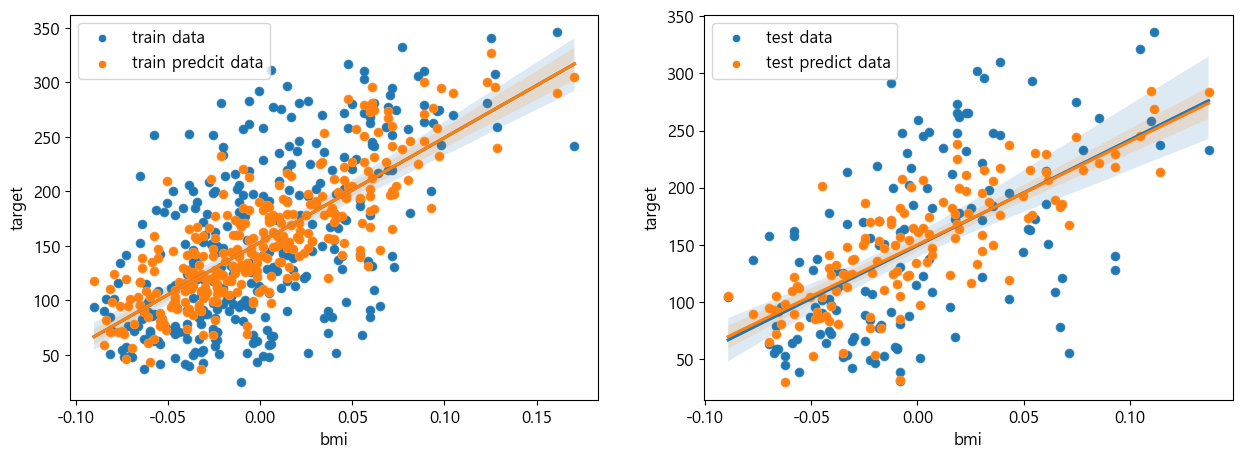

In [123]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
## 관측치 시각화 
sb.scatterplot(x=x_train['bmi'],y=y_train['target'],ax=ax1,label='train data')
## 관측치 추세선
sb.regplot(x=x_train['bmi'],y=y_train['target'],ax=ax1)

## 학습데이터에 따른 추정치
sb.scatterplot(x=x_train['bmi'],y=y_train_pred.reshape(-1),ax=ax1,label='train predcit data')
## 추정치에 따른 그래프
sb.regplot(x=x_train['bmi'],y=y_train_pred.reshape(-1),ax=ax1) 

## 검증 데이터 시각화
sb.scatterplot(x=x_test['bmi'],y=y_test['target'],label='test data',ax=ax2)
## 검증 데이터 추세선
sb.regplot(x=x_test['bmi'],y=y_test['target'],ax=ax2)

## 검증 데이터 추정치 
sb.scatterplot(x=x_test['bmi'],y=y_test_pred.reshape(-1),label='test predict data',ax=ax2)
## 검증 데이터 선그래프
sb.regplot(x=x_test['bmi'],y=y_test_pred.reshape(-1),ax=ax2)

## #05. 문제(5)

In [126]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [127]:
df= pd.read_excel('https://data.hossam.kr/E04/manhattan.xlsx')
df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rent              3539 non-null   int64  
 1   bedrooms          3539 non-null   float64
 2   bathrooms         3539 non-null   int64  
 3   size_sqft         3539 non-null   int64  
 4   min_to_subway     3539 non-null   int64  
 5   floor             3539 non-null   float64
 6   building_age_yrs  3539 non-null   int64  
 7   no_fee            3539 non-null   int64  
 8   has_roofdeck      3539 non-null   int64  
 9   has_washer_dryer  3539 non-null   int64  
 10  has_doorman       3539 non-null   int64  
 11  has_elevator      3539 non-null   int64  
 12  has_dishwasher    3539 non-null   int64  
 13  has_patio         3539 non-null   int64  
 14  has_gym           3539 non-null   int64  
 15  neighborhood      3539 non-null   object 
 16  borough           3539 non-null   object 


In [130]:
df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [134]:
num_col = ['bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs','rent']
cat_col= ['no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']




In [135]:
y=df[['rent']]

In [ ]:
min_to_subway,floor,building_age_yrs

In [136]:
df.loc[:,num_col].corr()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,rent
bedrooms,1.000000,0.720885,0.771263,0.076543,0.043539,0.037228,0.638336
bathrooms,0.720885,1.000000,0.803627,0.086932,0.127969,-0.095421,0.769474
size_sqft,0.771263,0.803627,1.000000,0.039448,0.107186,0.014489,0.857954
min_to_subway,0.076543,0.086932,0.039448,1.000000,0.082445,-0.184682,0.035164
floor,0.043539,0.127969,0.107186,0.082445,1.000000,-0.389260,0.215867
building_age_yrs,0.037228,-0.095421,0.014489,-0.184682,-0.389260,1.000000,-0.128895
rent,0.638336,0.769474,0.857954,0.035164,0.215867,-0.128895,1.000000


### 상관관계 확인 후 데이터 제거

In [137]:
df = df.drop(['min_to_subway','floor','building_age_yrs'],axis=1)




In [138]:
cat_col


['no_fee',
 'has_roofdeck',
 'has_washer_dryer',
 'has_doorman',
 'has_elevator',
 'has_dishwasher',
 'has_patio',
 'has_gym']

### 범주형 변수 분포 확인

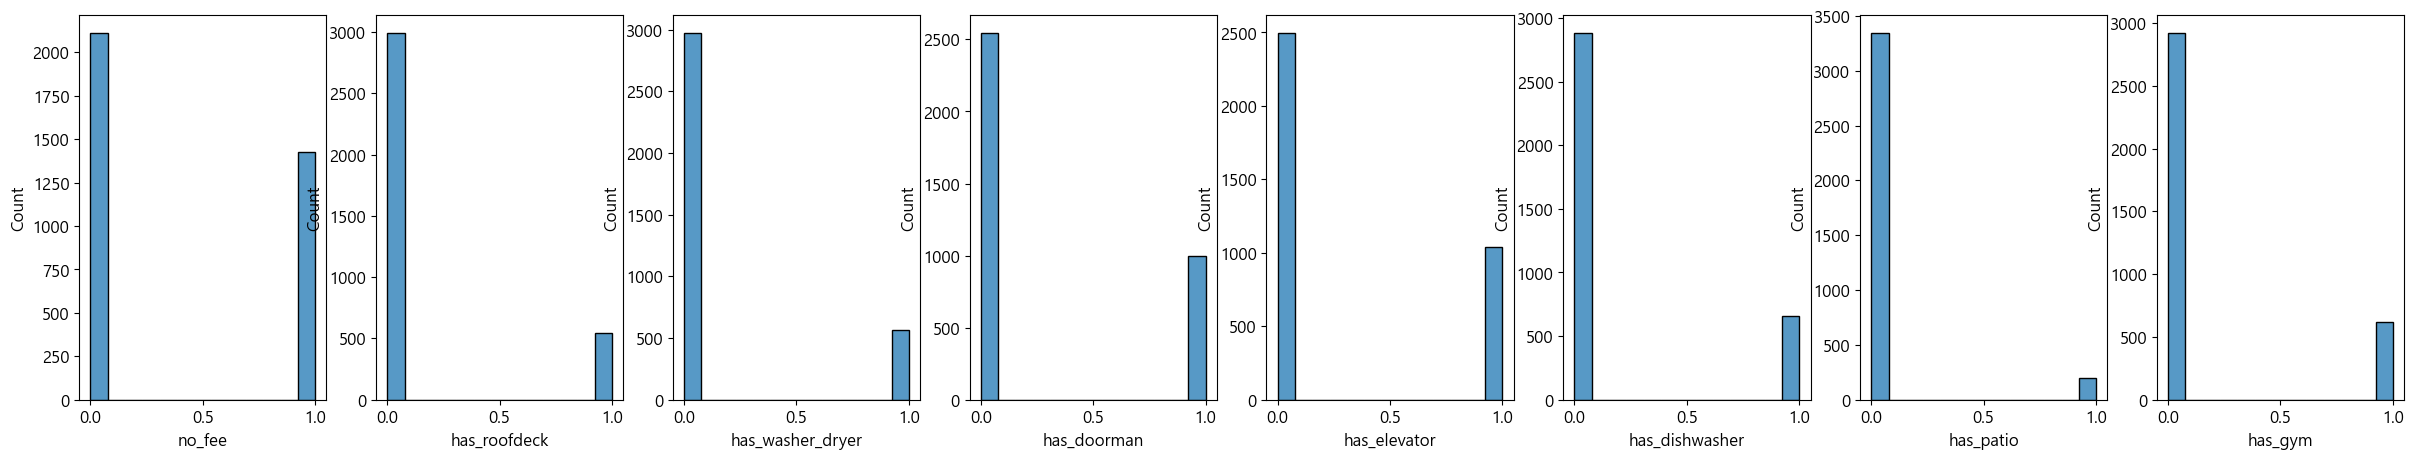

In [143]:
fig,ax = plt.subplots(1,len(cat_col),figsize=(30,5))
for col, ax in zip(cat_col,ax):
    sb.histplot(data=df,x=col,ax=ax)
## 별차이 없음 --> ㄱㄱ 

### 카테고리형으로 ㄱㄱ 


In [149]:
df[cat_col]=df[cat_col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   rent              3539 non-null   int64   
 1   bedrooms          3539 non-null   float64 
 2   bathrooms         3539 non-null   int64   
 3   size_sqft         3539 non-null   int64   
 4   no_fee            3539 non-null   category
 5   has_roofdeck      3539 non-null   category
 6   has_washer_dryer  3539 non-null   category
 7   has_doorman       3539 non-null   category
 8   has_elevator      3539 non-null   category
 9   has_dishwasher    3539 non-null   category
 10  has_patio         3539 non-null   category
 11  has_gym           3539 non-null   category
 12  neighborhood      3539 non-null   object  
 13  borough           3539 non-null   object  
dtypes: category(8), float64(1), int64(3), object(2)
memory usage: 194.6+ KB


In [150]:
num_col

['bedrooms',
 'bathrooms',
 'size_sqft',
 'min_to_subway',
 'floor',
 'building_age_yrs',
 'rent']

In [154]:
x_col = ['bedrooms',
 'bathrooms',
 'size_sqft']

### 다항식 변환


In [155]:
df.head()

,rent,bedrooms,bathrooms,size_sqft,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,0,0,0,1,1,1,0,1,Soho,Manhattan


In [156]:
poly = PolynomialFeatures(degree=2,include_bias=False)
fit=poly.fit_transform(df.loc[:,x_col])
poly.get_feature_names_out()

array(['bedrooms', 'bathrooms', 'size_sqft', 'bedrooms^2',
       'bedrooms bathrooms', 'bedrooms size_sqft', 'bathrooms^2',
       'bathrooms size_sqft', 'size_sqft^2'], dtype=object)

In [157]:
x=pd.DataFrame(fit,columns=poly.get_feature_names_out())
x.head()

,bedrooms,bathrooms,size_sqft,bedrooms^2,bedrooms bathrooms,bedrooms size_sqft,bathrooms^2,bathrooms size_sqft,size_sqft^2
0,0.0,1.0,480.0,0.0,0.0,0.0,1.0,480.0,230400.0
1,2.0,2.0,2000.0,4.0,4.0,4000.0,4.0,4000.0,4000000.0
2,1.0,1.0,916.0,1.0,1.0,916.0,1.0,916.0,839056.0
3,1.0,1.0,975.0,1.0,1.0,975.0,1.0,975.0,950625.0
4,2.0,2.0,4800.0,4.0,4.0,9600.0,4.0,9600.0,23040000.0


In [158]:
x[cat_col]=df.loc[:,cat_col]
x.head()

,bedrooms,bathrooms,size_sqft,bedrooms^2,bedrooms bathrooms,bedrooms size_sqft,bathrooms^2,bathrooms size_sqft,size_sqft^2,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1.0,480.0,0.0,0.0,0.0,1.0,480.0,230400.0,1,1,0,0,1,1,0,1
1,2.0,2.0,2000.0,4.0,4.0,4000.0,4.0,4000.0,4000000.0,0,0,0,0,0,0,0,0
2,1.0,1.0,916.0,1.0,1.0,916.0,1.0,916.0,839056.0,0,1,0,1,1,1,0,0
3,1.0,1.0,975.0,1.0,1.0,975.0,1.0,975.0,950625.0,0,0,0,1,1,1,0,1
4,2.0,2.0,4800.0,4.0,4.0,9600.0,4.0,9600.0,23040000.0,0,0,0,1,1,1,0,1


In [159]:
y.head()

,rent
0,2550
1,11500
2,4500
3,4795
4,17500


### 더미변수 ㄱㄱ 


In [160]:
x = pd.get_dummies(x,drop_first=True,dtype='int')
x.head()

,bedrooms,bathrooms,size_sqft,bedrooms^2,bedrooms bathrooms,bedrooms size_sqft,bathrooms^2,bathrooms size_sqft,size_sqft^2,no_fee_1,has_roofdeck_1,has_washer_dryer_1,has_doorman_1,has_elevator_1,has_dishwasher_1,has_patio_1,has_gym_1
0,0.0,1.0,480.0,0.0,0.0,0.0,1.0,480.0,230400.0,1,1,0,0,1,1,0,1
1,2.0,2.0,2000.0,4.0,4.0,4000.0,4.0,4000.0,4000000.0,0,0,0,0,0,0,0,0
2,1.0,1.0,916.0,1.0,1.0,916.0,1.0,916.0,839056.0,0,1,0,1,1,1,0,0
3,1.0,1.0,975.0,1.0,1.0,975.0,1.0,975.0,950625.0,0,0,0,1,1,1,0,1
4,2.0,2.0,4800.0,4.0,4.0,9600.0,4.0,9600.0,23040000.0,0,0,0,1,1,1,0,1


### 데이터 분리

In [161]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2477, 17)
(2477, 1)
(1062, 17)
(1062, 1)


### 회귀분석


In [162]:
model = LinearRegression()
fit = model.fit(x_train,y_train)

# 기울기 
coef = fit.coef_
# 절편
intercept = fit.intercept_
print ('기울기: ', coef)

print('절편 : ',intercept )



기울기:  [[-1.17431763e+02  8.39442035e+02  4.90599425e+00 -2.17654567e+02
   1.84749516e+02  1.15013037e-01 -7.28288655e+02  1.98320422e+00
  -1.21417875e-03  7.97706402e+01  5.12071944e+00  2.37178572e+02
  -4.90790144e+01  1.32831797e+02 -1.15999774e+02 -4.22947039e+01
  -9.45952480e+01]]
절편 :  [-541.61358984]


### 설명력


In [163]:
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)
print('훈련 데이터 설명력 : ',r2_score(y_train,y_train_pred))
print('검증 데이터 설명력 : ',r2_score(y_test,y_test_pred))

훈련 데이터 설명력 :  0.7835036888699773
검증 데이터 설명력 :  0.7465433070356966


### 에러율

In [164]:
print('훈련 데이터 MAE : ',mean_absolute_error(y_train,y_train_pred))

print('훈련 데이터 MAE : ',mean_absolute_error(y_test,y_test_pred))

print('훈련 데이터 MSE : ',mean_squared_error(y_train,y_train_pred))

print('훈련 데이터 MSE : ',mean_squared_error(y_test,y_test_pred))

print('훈련 데이터 RMSE : ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('훈련 데이터 RMSE : ',np.sqrt(mean_squared_error(y_test,y_test_pred)))


print('훈련 데이터 MAPE : ',np.mean(np.abs((y_train.values - y_train_pred)/y_train.values))*100)

print('검증 데이터 MAPE : ',np.mean(np.abs((y_test.values - y_test_pred)/y_test.values))*100)

print('훈련 데이터 MPE : ',np.mean((y_train.values - y_train_pred)/y_train.values)*100)

print('검증 데이터 MPE : ',np.mean((y_test.values - y_test_pred)/y_test.values)*100)

훈련 데이터 MAE :  966.5209997845687
훈련 데이터 MAE :  1017.6152447162726
훈련 데이터 MSE :  2170173.5435469863
훈련 데이터 MSE :  2520580.68145634
훈련 데이터 RMSE :  1473.1508896060127
훈련 데이터 RMSE :  1587.6336735709342
훈련 데이터 MAPE :  19.721599612953742
검증 데이터 MAPE :  20.85284872903878
훈련 데이터 MPE :  -5.33679981600718
검증 데이터 MPE :  -7.129198889206011


### 시각화

In [166]:
x_train.head()

,bedrooms,bathrooms,size_sqft,bedrooms^2,bedrooms bathrooms,bedrooms size_sqft,bathrooms^2,bathrooms size_sqft,size_sqft^2,no_fee_1,has_roofdeck_1,has_washer_dryer_1,has_doorman_1,has_elevator_1,has_dishwasher_1,has_patio_1,has_gym_1
3106,2.0,1.0,800.0,4.0,2.0,1600.0,1.0,800.0,640000.0,0,1,0,1,1,1,0,0
2627,1.0,1.0,775.0,1.0,1.0,775.0,1.0,775.0,600625.0,0,0,0,0,0,0,0,0
1213,1.0,2.0,1201.0,1.0,2.0,1201.0,4.0,2402.0,1442401.0,1,1,1,1,1,1,1,1
1300,1.0,1.0,835.0,1.0,1.0,835.0,1.0,835.0,697225.0,1,0,0,0,0,0,0,0
1908,0.0,1.0,400.0,0.0,0.0,0.0,1.0,400.0,160000.0,1,0,0,0,0,0,0,0


<Axes: xlabel='size_sqft', ylabel='rent'>

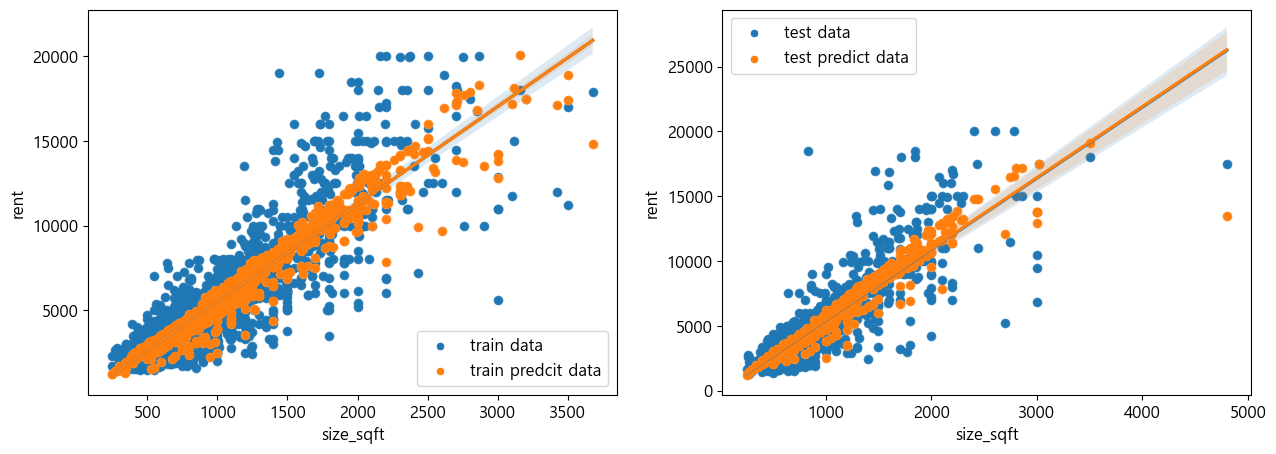

In [167]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
## 관측치 시각화 
sb.scatterplot(x=x_train['size_sqft'],y=y_train['rent'],ax=ax1,label='train data')
## 관측치 추세선
sb.regplot(x=x_train['size_sqft'],y=y_train['rent'],ax=ax1)

## 학습데이터에 따른 추정치
sb.scatterplot(x=x_train['size_sqft'],y=y_train_pred.reshape(-1),ax=ax1,label='train predcit data')
## 추정치에 따른 그래프
sb.regplot(x=x_train['size_sqft'],y=y_train_pred.reshape(-1),ax=ax1) 

## 검증 데이터 시각화
sb.scatterplot(x=x_test['size_sqft'],y=y_test['rent'],label='test data',ax=ax2)
## 검증 데이터 추세선
sb.regplot(x=x_test['size_sqft'],y=y_test['rent'],ax=ax2)

## 검증 데이터 추정치 
sb.scatterplot(x=x_test['size_sqft'],y=y_test_pred.reshape(-1),label='test predict data',ax=ax2)
## 검증 데이터 선그래프
sb.regplot(x=x_test['size_sqft'],y=y_test_pred.reshape(-1),ax=ax2)